In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-07-11 21:46:14.636608


In [2]:
#Importing Data
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False)

In [3]:
#Finding all dtypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
#Finding missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<Axes: ylabel='Frequency'>

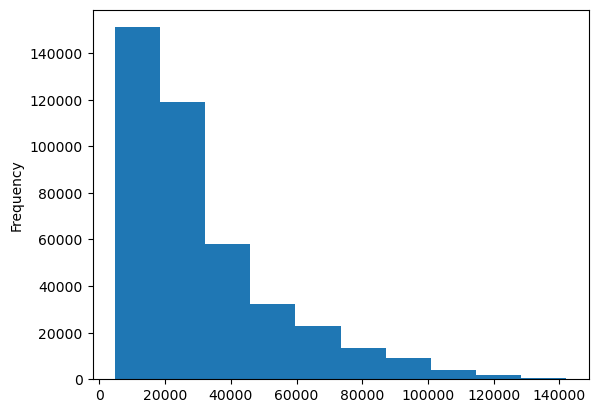

In [5]:
df.SalePrice.plot.hist()

# Parsing Dates
Changing date data format to datetime object

In [6]:
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

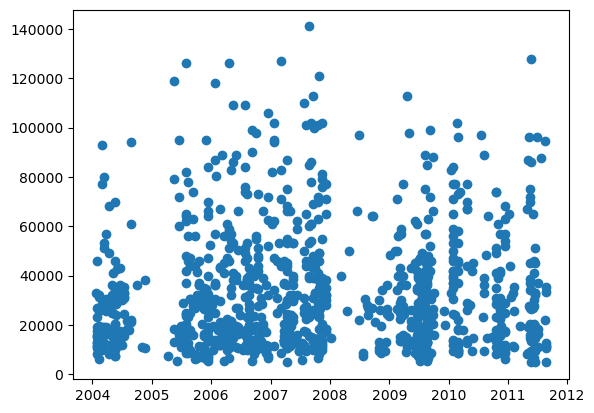

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

## Sorting Data by Date

In [8]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)


205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
#Making a copy
df_tmp = df.copy()

In [10]:
#Datetime parameters for timeseries saledate
df_tmp["saleYear"]=df_tmp.saledate.dt.year.astype("int64")
df_tmp["saleMonth"]=df_tmp.saledate.dt.month.astype("int64")
df_tmp["saleDay"] = df_tmp.saledate.dt.day.astype("int64")
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek.astype("int64")
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear.astype("int64")
df_tmp.drop("saledate", axis=1,inplace=True)

In [11]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Modelling

### Model-Driven EDA

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
#Finding columns which contain strings/objects and converting to category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
        
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
#converting int32 to int64        
for col in df.select_dtypes(include=['int32']).columns:
    df[col] = df[col].astype('int64')



In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

# Save Preprocessed Data

In [15]:
#save preprocessed data
df_tmp.to_csv("data/train_tmp.csv",
              index=False)

In [16]:
#Loading data
df_tmp = pd.read_csv("data/train_tmp.csv",
                     low_memory=False)

In [17]:
#Finding numeric columns with null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [18]:
#Filling with median values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label]= content.fillna(content.median())

In [ ]:
#Checking if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [19]:
#Filling categorical variables
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]= pd.Categorical(content).codes +1
        

In [20]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [21]:
%%time
#Instantiate model
model = RandomForestRegressor(n_jobs=-1)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 21min 42s, sys: 15.3 s, total: 21min 58s
Wall time: 3min 34s


RandomForestRegressor(n_jobs=-1)

In [22]:

model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9876129359002594

# Splitting Data into Train and Val Sets

In [23]:
#Split data into train/validation sets
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [24]:
X_train, y_train = df_train.drop("SalePrice", axis =1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

# Builidng an Evaluation Function
using MSLE make RMSLE

In [25]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train,train_preds),
              "Valid RMSLE": rmsle(y_valid,val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid,val_preds)}
    return scores

# Tuning Hyperparameters(testing model on subset)



In [26]:
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000)


In [27]:
%%time
model.fit(X_train, y_train)

CPU times: user 43.3 s, sys: 675 ms, total: 44 s
Wall time: 7.44 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [28]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

# Hyperparameter tuning with RandomizedSearchCV

In [29]:
#Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                              n_iter=1000,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/Users/DELL/Desktop/BITS/Coding/ml_projects/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1225 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1225 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/DELL/Desktop/BITS/Coding/ml_projects/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/DELL/Desktop/BITS/Coding/ml_projects/env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/DELL/Desktop/BITS/Coding/ml_projects/env/lib/python3.12/site-pa

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=1000,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [30]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [31]:
show_scores(rs_model)

{'Training MAE': 5731.66235765036,
 'Valid MAE': 7208.994462326104,
 'Training RMSLE': 0.26411060415469345,
 'Valid RMSLE': 0.2963198945207346,
 'Training R^2': 0.8544325429552881,
 'Valid R^2': 0.835104640533713}

# Train model with the best params

In [47]:
%%time

ideal_model = RandomForestRegressor(n_estimators=80,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(X_train,y_train)

CPU times: user 8min 27s, sys: 7.76 s, total: 8min 35s
Wall time: 1min 25s


RandomForestRegressor(max_features=0.5, n_estimators=80, n_jobs=-1,
                      random_state=42)

In [48]:
show_scores(ideal_model)

{'Training MAE': 1571.5644178352552,
 'Valid MAE': 5946.84560075175,
 'Training RMSLE': 0.0837243790167143,
 'Valid RMSLE': 0.24665008261281904,
 'Training R^2': 0.9878395583733571,
 'Valid R^2': 0.8829893905065961}

# Predictions on Test Dataset

In [34]:
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

# Preprocessing Data(since not int the same format)

In [35]:
#Preprocessing test dataset
def preprocess_data(df):
    df["saleYear"]=df.saledate.dt.year.astype("int64")
    df["saleMonth"]=df.saledate.dt.month.astype("int64")
    df["saleDay"] = df.saledate.dt.day.astype("int64")
    df["saleDayofWeek"] = df.saledate.dt.dayofweek.astype("int64")
    df["saleDayofYear"] = df.saledate.dt.dayofyear.astype("int64")
    df.drop("saledate", axis=1,inplace=True)
    
    #Finding columns which contain strings/objects and converting to category
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label]= content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]= pd.Categorical(content).codes +1
            
    for col in df.select_dtypes(include=['int32']).columns:
        df[col] = df[col].astype('int64')

        
            

    return df
    

In [36]:
df_test = preprocess_data(df_test)
#Adjusting the missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [37]:
auc = df_test.pop('auctioneerID_is_missing')
df_test.insert(56,'auctioneerID_is_missing',auc)

In [38]:
test_preds = ideal_model.predict(df_test)

In [39]:
#Format prediction
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [45]:
#Helper function for plotting Feature Importance
import seaborn as sns
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns, 
                        "feature_importances":importances})
          .sort_values("feature_importances", ascending = False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis(
    )

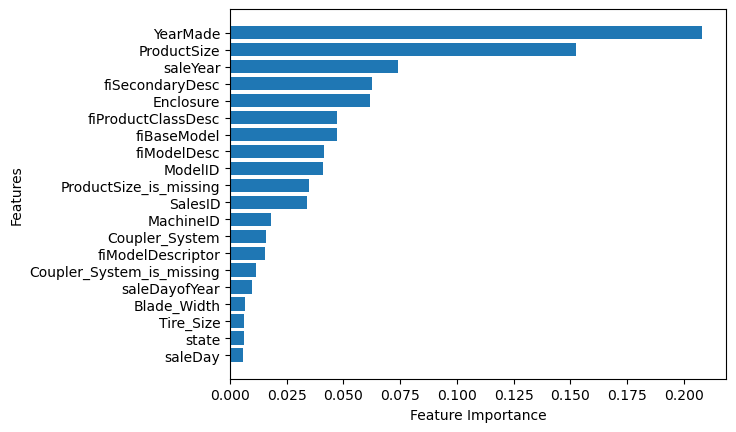

In [46]:
plot_features(X_train.columns, ideal_model.feature_importances_)